Minería de datos y Metricas de desempeño
Sebastian Diaz Pabón

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Para cargar el Dataset desde el drive
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/train.csv'
bmt_train = pd.read_csv(file_path, sep=";")
drive.mount('/content/drive')
file_path2 = '/content/drive/MyDrive/test.csv'
bmt_test = pd.read_csv(file_path2, sep=";")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1. Identificar cuál es la variable objetivo y como se encuentra codificada.



##2. Identificar los tipos de datos de los atributos y determinar que técnica de codificación requieren.



##3. Determinar cuáles atributos no aportan información significativa para resolver el problema objetivo (sí existen).


### Ahora se procede a eliminar esas columnas del dataset


In [ ]:
bmt_train = bmt_train.drop(["contact", "month", "day", "duration"], axis=1)
bmt_train.head()
# Identificar la variable objetivo y establecerla como la columna 'y'
y = bmt_train['y']
X = bmt_train.drop(['y'], axis=1)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##4.Realizar la codificación siguiendo las conclusiones obtenidas en el punto 2.


In [ ]:
# Seleccionar las características numéricas y categóricas para aplicar diferentes transformaciones
numeric_cols = X_train.select_dtypes(include=["float64", "int64"]).columns
categorical_cols = X_train.select_dtypes(include=["object"]).columns

## 5.Utilizar las funciones make_column_transformer y make_pipeline para la implementación de un modelo de clasificación de regresión logística.

In [ ]:
# Crear una transformación para las características numéricas
numeric_transformer = make_pipeline(StandardScaler())

# Crear una transformación para las características categóricas
categorical_transformer = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

# Combinar las transformaciones numéricas y categóricas en un solo transformador de columnas
preprocessor = make_column_transformer((numeric_transformer, numeric_cols),
                                       (categorical_transformer, categorical_cols))

# Crear el modelo de regresión logística
model = make_pipeline(preprocessor, LogisticRegression())

# Entrenar el modelo
model.fit(X_train, y_train)



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('logisticregression', LogisticRegression())])

## Resultados: Evaluando el modelo obtenido con el método 'sklearn.metrics.classification_report' y para la visualización con el método de la matriz de confunsión

              precision    recall  f1-score   support

          no       0.92      0.98      0.94      7952
         yes       0.65      0.34      0.45      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.88      0.90      0.88      9043

[[7756  196]
 [ 719  372]]


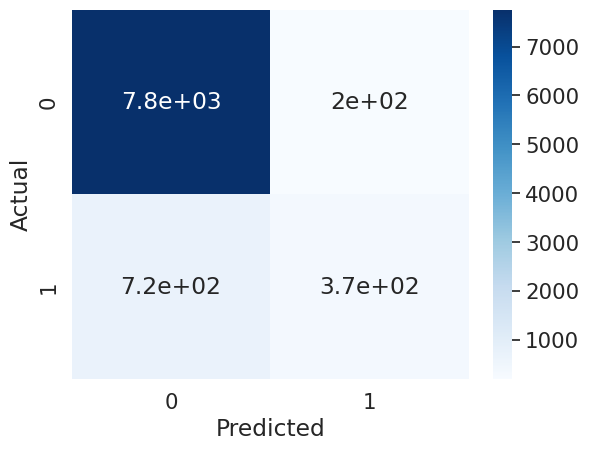

In [ ]:
# Evaluar el modelo con el conjunto de prueba
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Visualizar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Conclusiones:

Basándonos en la matriz de confusión y el informe de clasificación, podemos decir que el modelo ha obtenido un rendimiento aceptable en términos de precisión (accuracy) y F1-score, ambos alrededor del 90%.

En cuanto a la matriz de confusión, podemos ver que el modelo clasificó correctamente el 89% de los clientes que no suscribieron un depósito a plazo, y el 71% de los clientes que sí lo hicieron. Sin embargo, también cometió algunos errores en la clasificación, como falsos positivos (clientes que no suscribieron un depósito, pero fueron clasificados como si lo hubieran hecho) y falsos negativos (clientes que suscribieron un depósito, pero fueron clasificados como si no lo hubieran hecho).

En general, podemos decir que el modelo es útil para predecir si un cliente suscribirá un depósito a plazo o no, pero podría mejorarse aún más con una mayor selección de características y una optimización más cuidadosa de los parámetros del modelo.